In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

import seaborn as sns

In [4]:
df_train = pd.read_csv("train_users_2.csv")
df_test = pd.read_csv("test_users.csv")

In [5]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


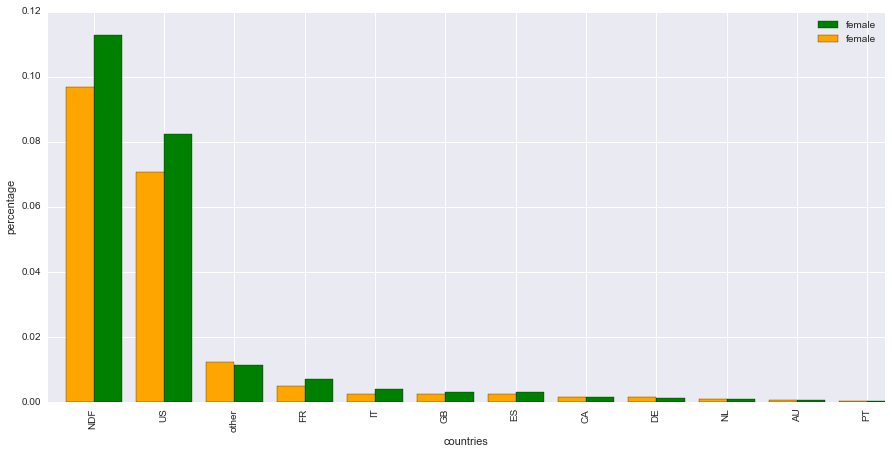

In [8]:
all_users = pd.concat((df_train, df_test), ignore_index=True, axis=0)

ml = all_users.loc[all_users.gender == 'MALE', 'country_destination']
fml = all_users.loc[all_users.gender == 'FEMALE', 'country_destination']

(fml.value_counts()/len(all_users)).plot(kind='bar', figsize=(15,7), width=0.4, position=0, label='female', color='green')
(ml.value_counts()/len(all_users)).plot(kind='bar', figsize=(15,7), width=0.4, position=1, label='female', color='orange')

plt.legend()
plt.xlabel("countries")
plt.ylabel("percentage")

In [9]:
print ("TrainSet: " + str(len(df_train)))
print ("TestSet: " + str(len(df_test)))

TrainSet: 213451
TestSet: 62096


In [10]:
all_users.drop('id', axis=1, inplace=True)

In [11]:
all_users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [12]:
all_users.gender.replace('-unknown-', np.nan, inplace=True)

In [13]:
user_nan = (all_users.isnull().sum()/len(all_users))*100
user_nan[user_nan > 0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [14]:
# how many users are outside sensible age ranges
print sum(all_users.age > 100)
print sum(all_users.age < 18)

2690
188


In [15]:
# do not consider all ages below legal age and over 100
all_users.loc[all_users.age < 18, 'age'] = np.nan
all_users.loc[all_users.age > 100, 'age'] = np.nan

In [16]:
all_users.describe()

,age,signup_flow,timestamp_first_active
count,155803.000000,275547.000000,2.755470e+05
mean,36.071186,4.291965,2.013310e+13
std,11.654972,8.794313,9.146438e+09
min,18.000000,0.000000,2.009032e+13
25%,28.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,2.014010e+13
75%,42.000000,1.000000,2.014062e+13
max,100.000000,25.000000,2.014093e+13


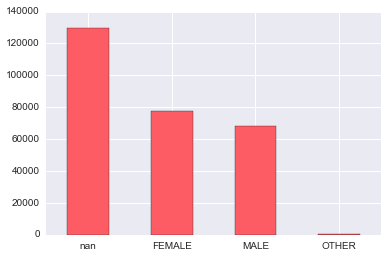

In [17]:
all_users.gender.value_counts(dropna=False).plot(kind='bar', rot=0, color='#FD5C64')

In [18]:
males = all_users.loc[all_users.gender=='MALE', 'country_destination'].value_counts(dropna=False)
fmales = all_users.loc[all_users.gender=='FEMALE', 'country_destination'].value_counts(dropna=False)

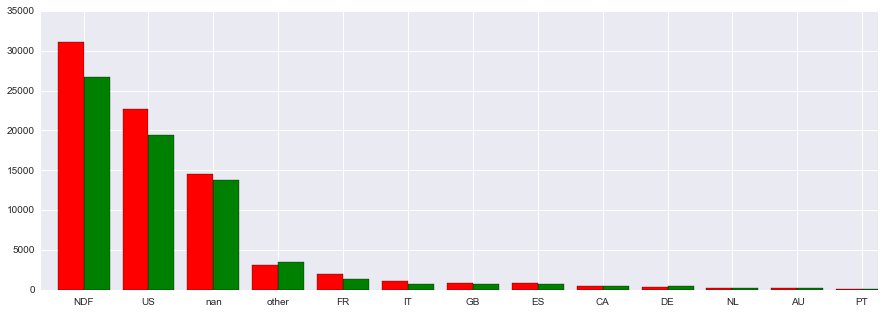

In [24]:
males.plot(kind='bar', width=0.4, color='green', label='Male', position=0, rot=0, figsize=(15,5))
fmales.plot(kind='bar', width=0.4, color='red', label='Female', position=1, rot=0)

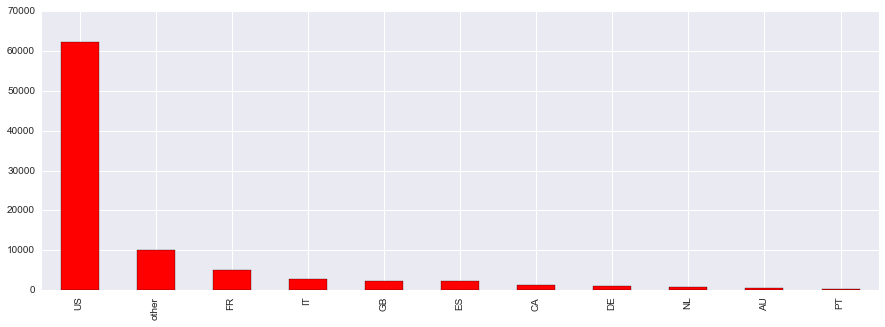

In [23]:
all_users.loc[all_users.country_destination!='NDF'].country_destination.value_counts().plot(kind='bar', color='red', figsize=(15,5))

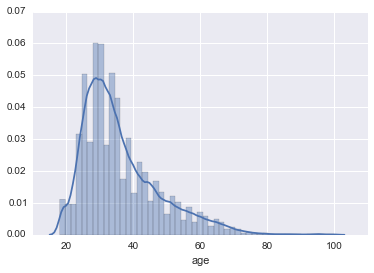

In [25]:
sns.distplot(all_users.age.dropna())

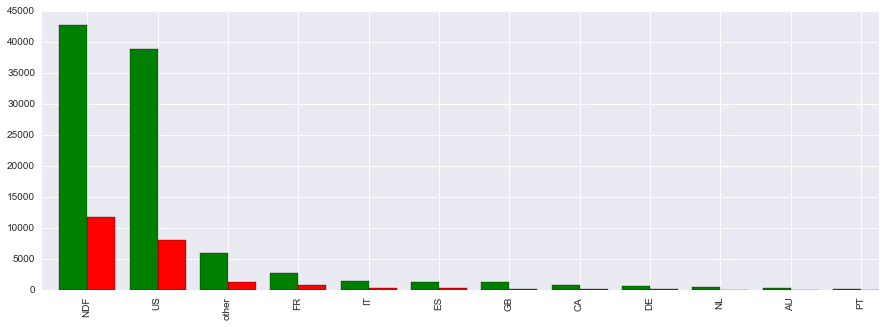

In [30]:
younger = all_users.loc[all_users.age < 45, 'country_destination'].value_counts()
older = all_users.loc[all_users.age > 45, 'country_destination'].value_counts()

older.plot(kind='bar', width=0.4, position=0, label='older', color='red')
younger.plot(kind='bar', width=0.4, position=1, label='younger', color='green', figsize=(15,5))